In [8]:
import json
from data.dataloader import DataLoader, LanguageTag

dataloader = DataLoader(index=0, language=LanguageTag.KOR)


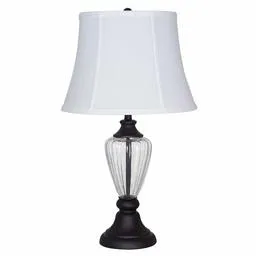

[B07DBHC36Z] Ravenna 가정용 곡선 유리 테이블 램프, 21197-000
{
    "item_id": "B07DBHC36Z",
    "bullet_point": "",
    "item_name": "Ravenna 가정용 곡선 유리 테이블 램프, 21197-000",
    "product_type": [
        "LAMP"
    ],
    "main_image_id": "41gQirA2zsL",
    "other_image_id": [
        "519X5TwxvCL",
        "91xNs2C3BaL",
        "61VqJGViWCL",
        "51VkadkM22L",
        "513y8u-YPEL",
        "51mFfHcQ2dL",
        "417FoWZTBXL"
    ],
    "node": [
        "/Categories/Lighting & Ceiling Fans/Lamps & Shades/Table Lamps"
    ],
    "image_id": "41gQirA2zsL",
    "height": 1010.0,
    "width": 1010.0,
    "img_path": "73/73820696.jpg"
}


In [10]:
id = dataloader.get_random_id()
item = dataloader.show_item(item_id=id)

print(json.dumps(item, indent=4, ensure_ascii=False))

상품 정보는 위와 같이 JSON 형태로 표현될 수 있습니다. 이 데이터를 RAG 용 데이터로 활용하기에는 몇 가지 문제가 있습니다.

- **부족한 제품 설명**: 제품 설명(productDescriptors)에는 태그 값이 혼재되어 있을 뿐만 아니라, 주로 상품 설명보다는 주의 사항이나 관리 방법을 기술하고 있습니다. 이는 제품 자체의 특성을 설명하기에는 부족하여, 사용자가 원하는 제품 정보를 검색 하는 데 어려움을 겪을 수 있습니다.
- **JSON 포맷의 데이터**: Language Model은 일반적으로 자연어 텍스트로 학습이 되어 있어, JSON 구조에서는 필요한 정보를 효율적으로 추출하기 어려울 수 있습니다.

이를 해결하기 위해 아래와 같은 데이터 가공 작업을 수행합니다.

- 제품 이름과 관련된 모든 정보를 한국어로 번역하여, 사용자가 보다 쉽게 접근할 수 있도록 합니다.
- JSON 필드값과 상품 이미지를 기반으로, 제품의 주요 특성을 강조하는 설명 문구를 새롭게 작성합니다. 이를 통해 사용자에게 더 명확하고 유용한 정보를 제공할 수 있습니다.

In [6]:
type(item)

dict

In [4]:
from data.augmentation import Augmentation

augmentation = Augmentation()

# 상품 소개 글 생성
desc = augmentation.gen_description(item)
print(desc)

# 상품 메타 정보 JSON 포맷으로 생성
metadata = augmentation.gen_properties(item)
print(metadata)

'thumbnail'
None


KeyError: 'thumbnail'